<a href="https://colab.research.google.com/github/FGalvao77/EDA-DS---Credit-Score-Classification-Prediction/blob/main/EDA_%26_DS_Credit_Score_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## **EDA & DS - Credit Score Classification Prediction**
---
---

In [1]:
!curl https://raw.githubusercontent.com/FGalvao77/datasets/main/Credit%20Score%20Classification%20Dataset.csv >> credit_score.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9001  100  9001    0     0  72588      0 --:--:-- --:--:-- --:--:-- 72588


In [2]:
%ls

credit_score.csv  sample_data/


In [3]:
!head credit_score.csv

Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
25,Female,50000,Bachelor's Degree,Single,0,Rented,High
30,Male,100000,Master's Degree,Married,2,Owned,High
35,Female,75000,Doctorate,Married,1,Owned,High
40,Male,125000,High School Diploma,Single,0,Owned,High
45,Female,100000,Bachelor's Degree,Married,3,Owned,High
50,Male,150000,Master's Degree,Married,0,Owned,High
26,Female,40000,Associate's Degree,Single,0,Rented,Average
31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
36,Female,80000,Master's Degree,Married,2,Owned,High


In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv(filepath_or_buffer='credit_score.csv',
                 sep=',')

print(df.shape)
df.head(n=15)

(164, 8)


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
8,36,Female,80000,Master's Degree,Married,2,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [7]:
!pip install --q sweetviz -U 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.1 MB/s eta 0:00:00


In [8]:
import sweetviz

In [9]:
eda_viz = sweetviz.analyze(source=df)
eda_viz.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
cat_vars = df.select_dtypes(exclude=int).columns[:-1]
num_vars = df.select_dtypes(exclude=object).columns

cat_vars, num_vars

(Index(['Gender', 'Education', 'Marital Status', 'Home Ownership'], dtype='object'),
 Index(['Age', 'Income', 'Number of Children'], dtype='object'))

In [11]:
vars = ['Gender', 'Education', 'Marital Status', 
        'Home Ownership', 'Number of Children']

vars

['Gender',
 'Education',
 'Marital Status',
 'Home Ownership',
 'Number of Children']

In [12]:
%matplotlib inline 
plt.style.use(style='ggplot')
sns.set_theme(color_codes=True)

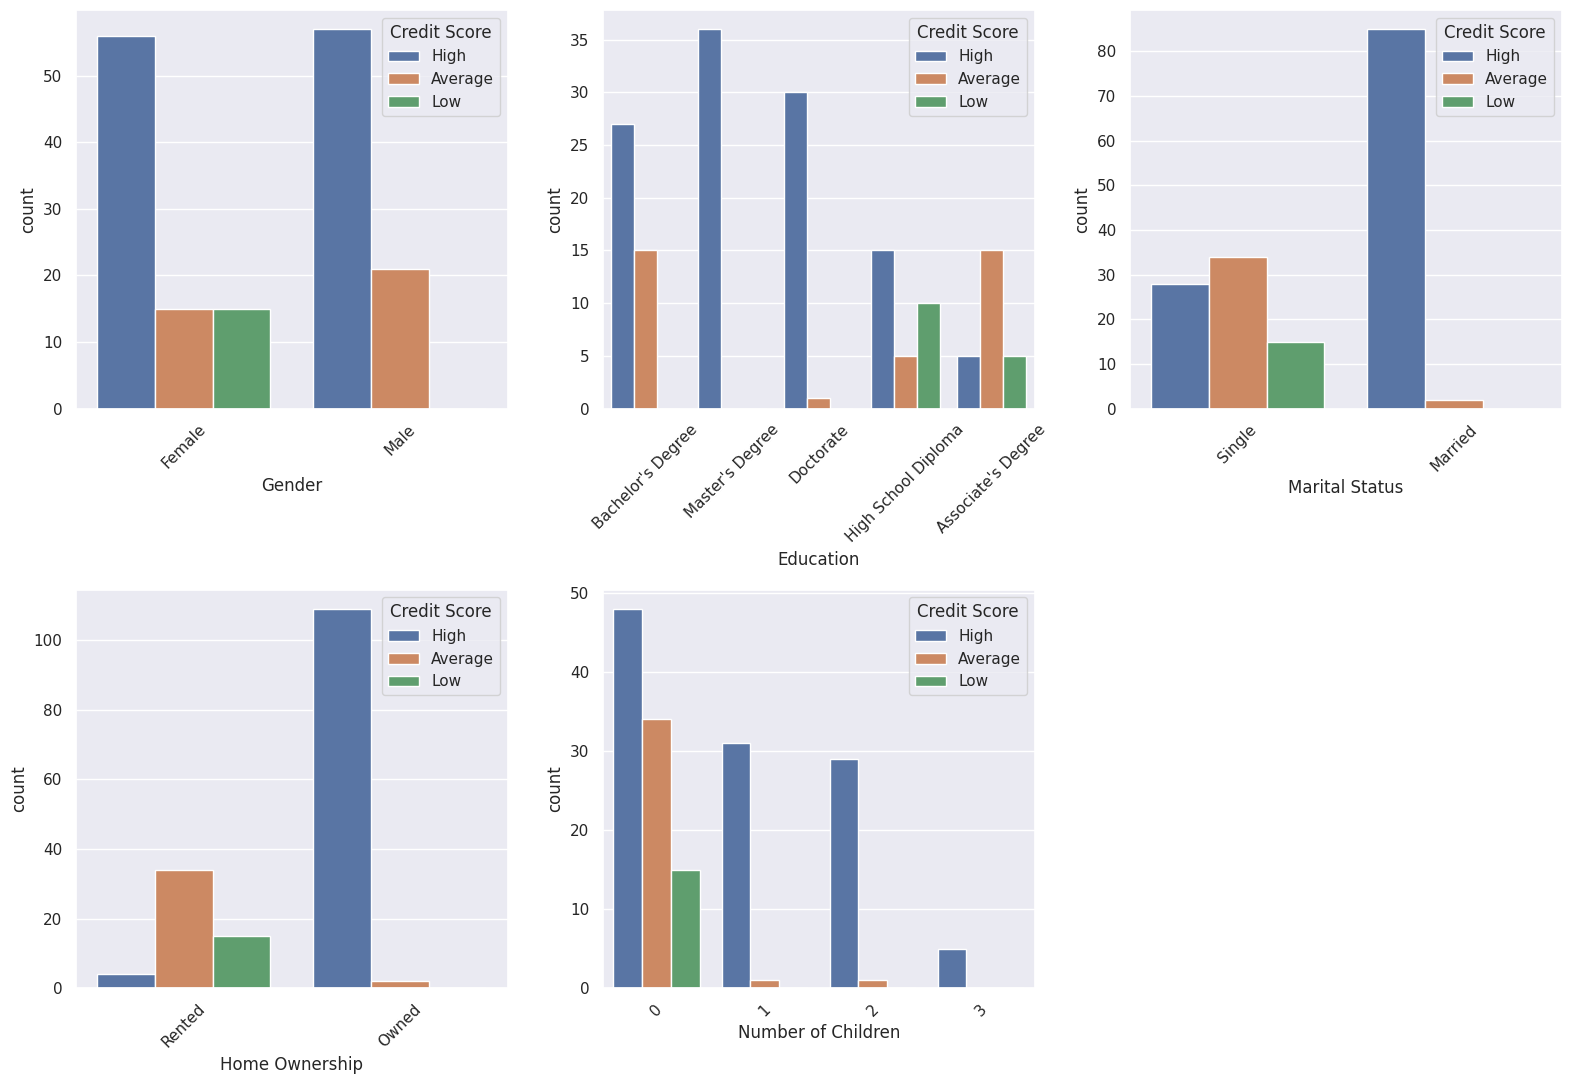

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 11))
ax = ax.flatten()

for i, var in enumerate(vars):
    sns.countplot(data=df, 
                  x=var, 
                  hue='Credit Score', 
                  ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), 
                           rotation=45)
    
fig.tight_layout()
fig.delaxes(ax[5])
plt.show()

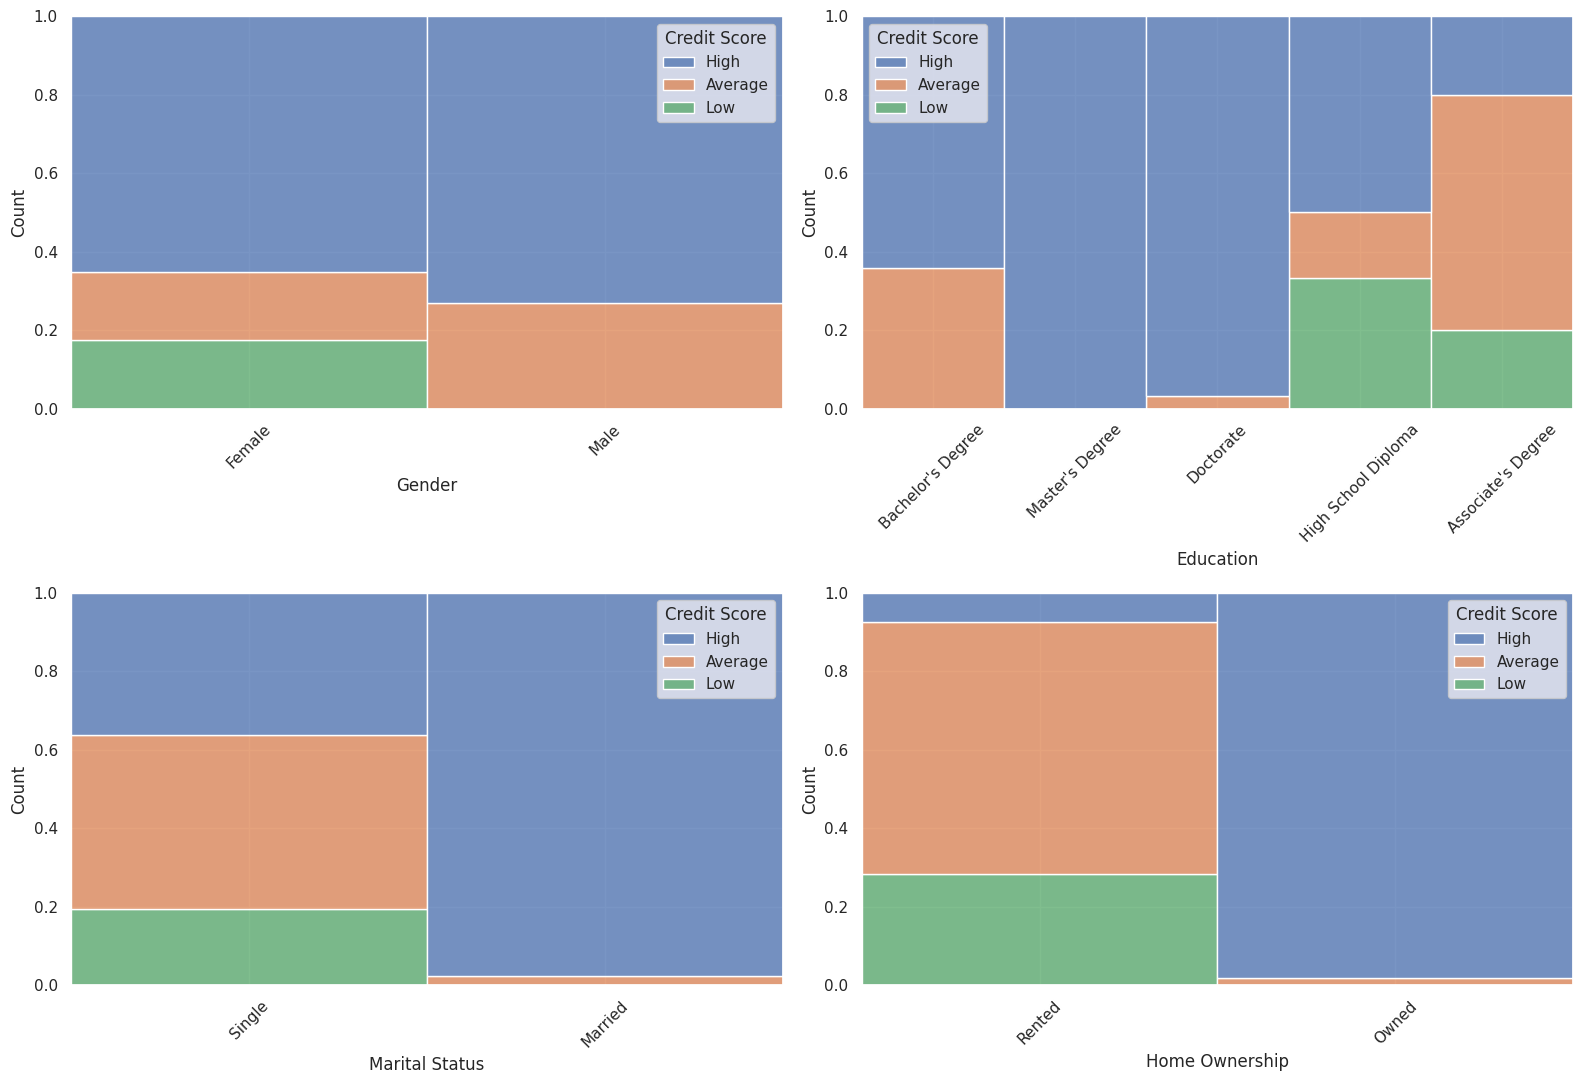

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 11))
ax = ax.flatten()

for i, var in enumerate(vars[:-1]):
    sns.histplot(data=df,
                 x=var,
                 hue='Credit Score',
                 ax=ax[i],
                 multiple='fill',
                 kde=False,
                 element='bars')
    ax[i].set_xticklabels(df[var].unique(), 
                           rotation=45)
    ax[i].set_xlabel(var)
    
fig.tight_layout()
plt.show()

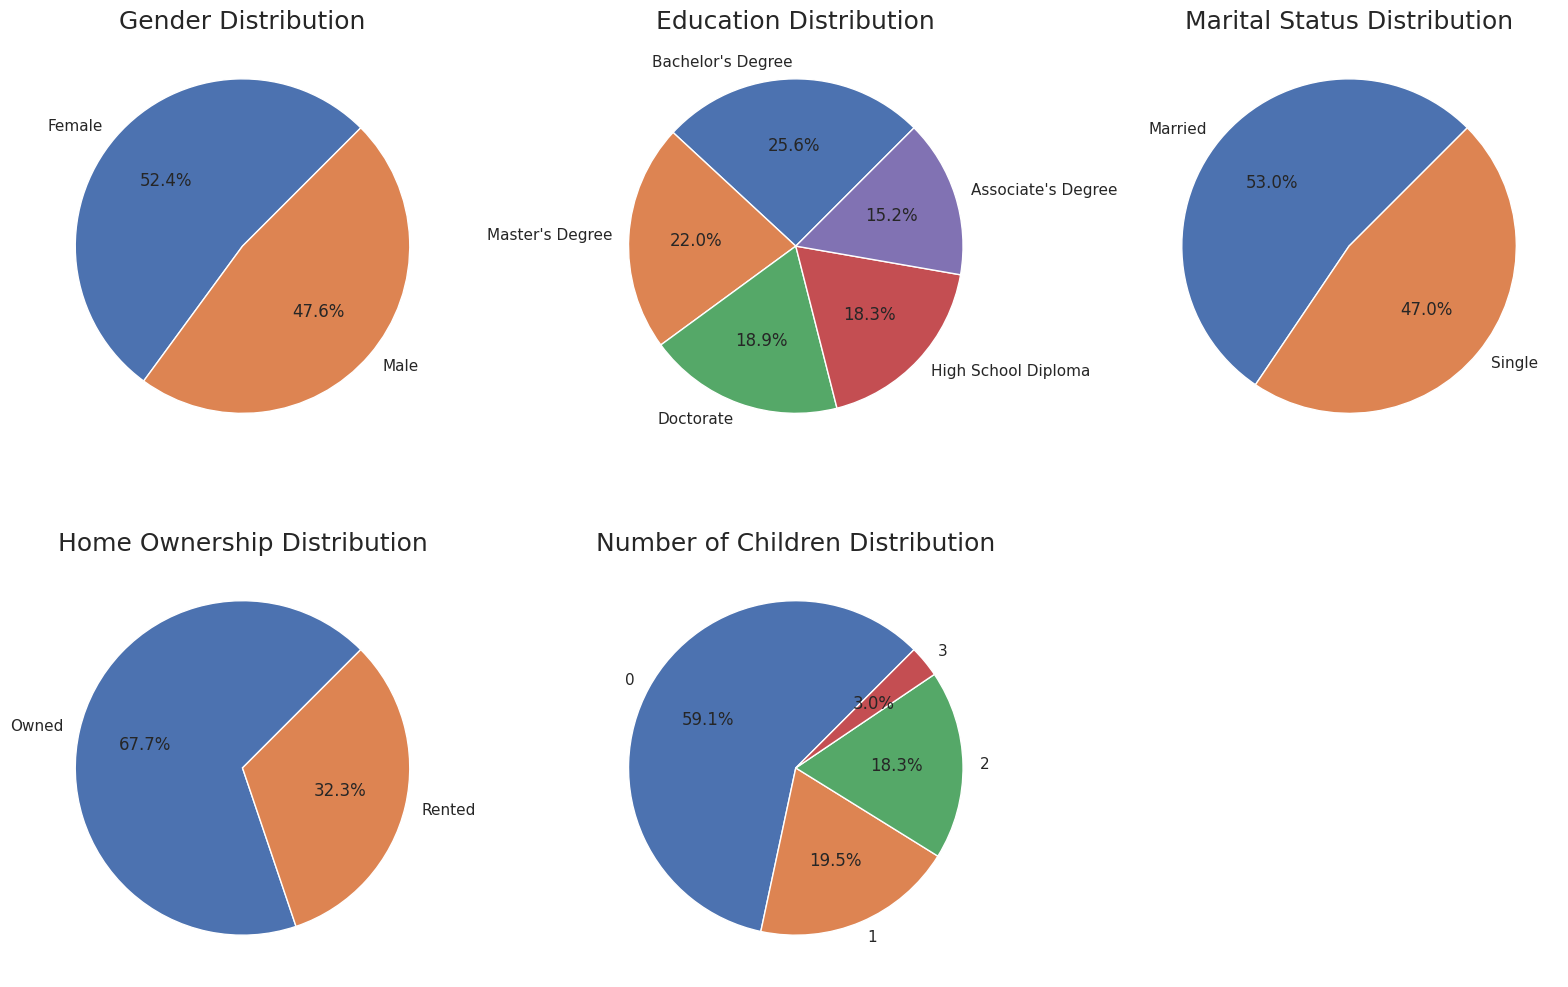

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 11))

for i, var in enumerate(vars):
    if i < len(ax.flat):
        cat_counts = df[var].value_counts()
        ax.flat[i].pie(cat_counts, labels=cat_counts.index,
                       autopct='%1.1f%%',
                       startangle=45)
        ax.flat[i].set_title(f'{var} Distribution', size=18)
    
fig.tight_layout()
fig.delaxes(ax[1][2])
plt.show()

In [16]:
num_vars = df.select_dtypes(exclude=object).columns[:2]

num_vars

Index(['Age', 'Income'], dtype='object')

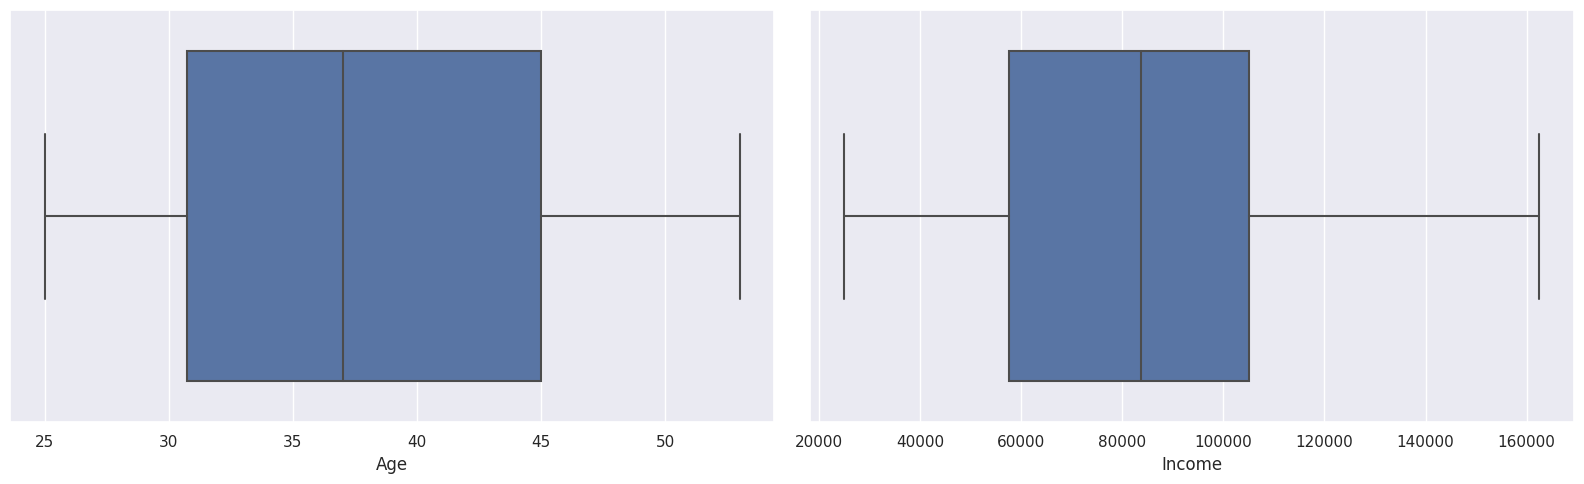

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax = ax.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(data=df,
                x=var,
                ax=ax[i])

fig.tight_layout()
plt.show()

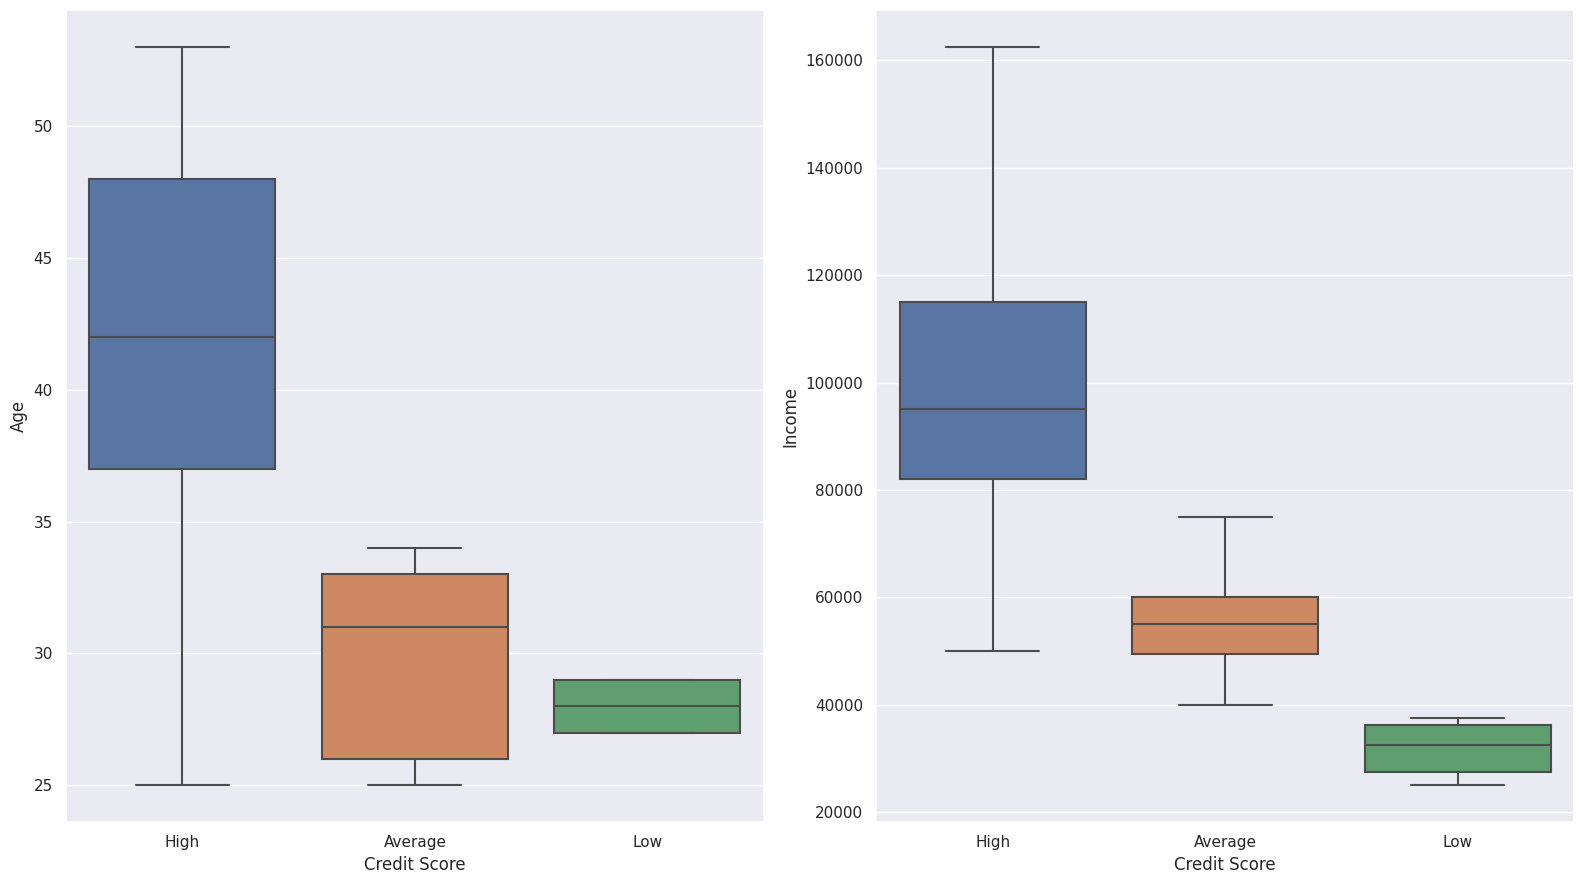

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax = ax.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(data=df,
                y=var,
                x='Credit Score',
                ax=ax[i])

fig.tight_layout()
plt.show()

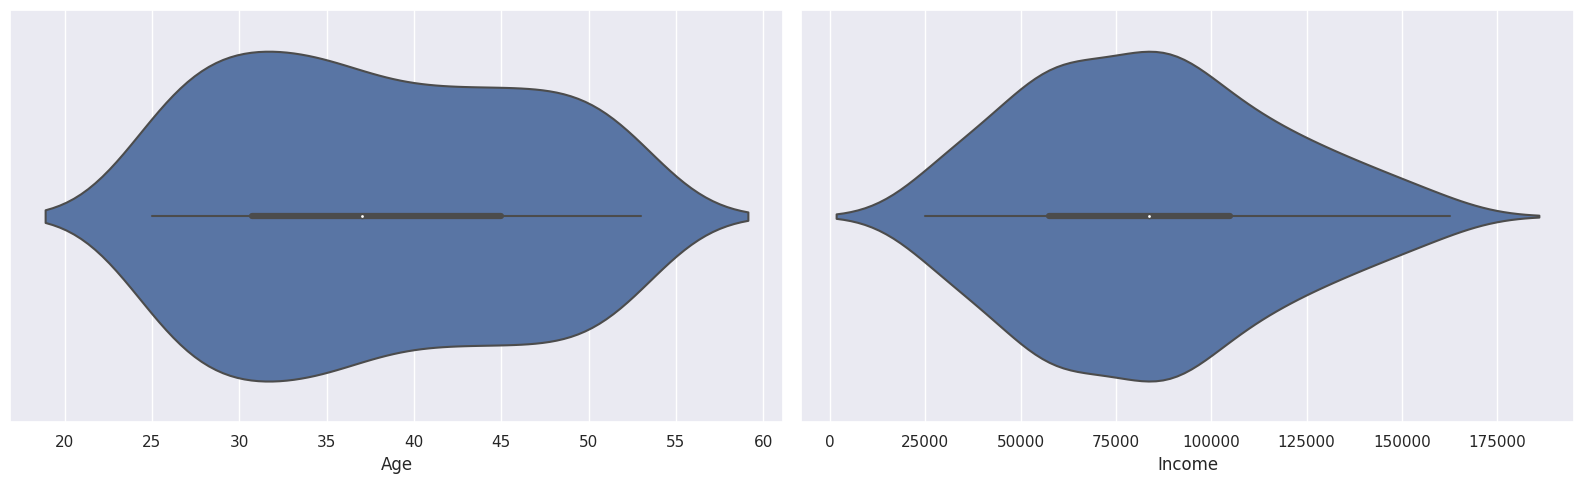

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(data=df,
                   x=var,
                   ax=ax[i])

fig.tight_layout()
plt.show()

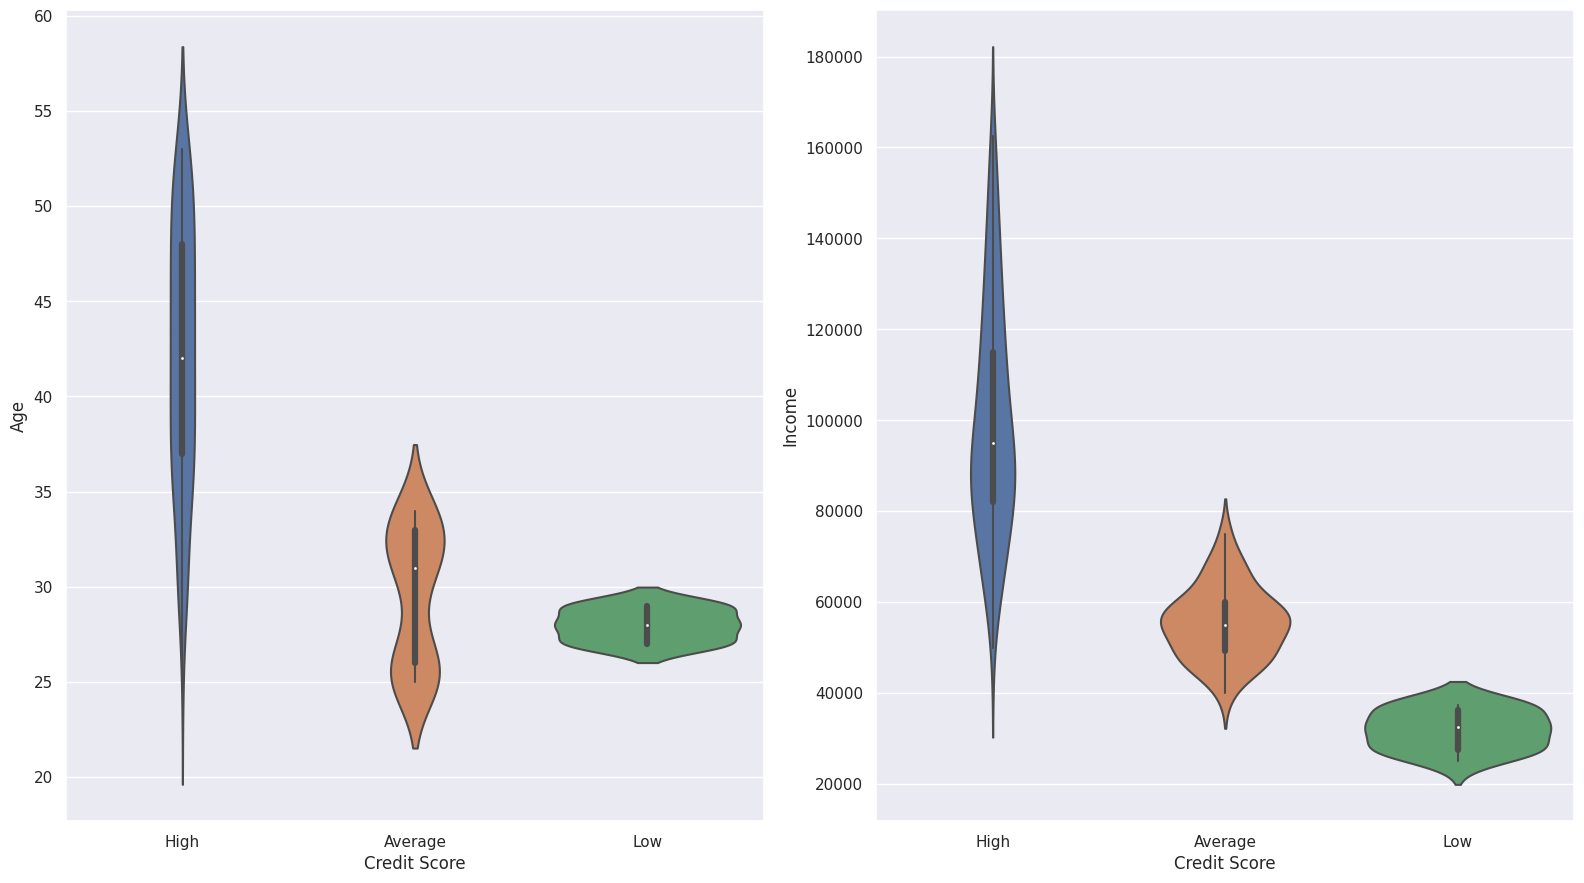

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(data=df,
                   y=var,
                   x='Credit Score',
                   ax=ax[i])

fig.tight_layout()
plt.show()

In [21]:
check_missing = df.isna().sum() * 100 / df.shape[0]

check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [22]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

Gender: ['Female' 'Male']
Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Credit Score: ['High' 'Average' 'Low']


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
for col in df.select_dtypes(include=['object']).columns:
    lb = LabelEncoder()
    lb.fit(df[col].unique())

    df[col] = lb.transform(df[col])
    print(f'{col}: {df[col].unique()}')

Gender: [0 1]
Education: [1 4 2 3 0]
Marital Status: [1 0]
Home Ownership: [1 0]
Credit Score: [1 0 2]


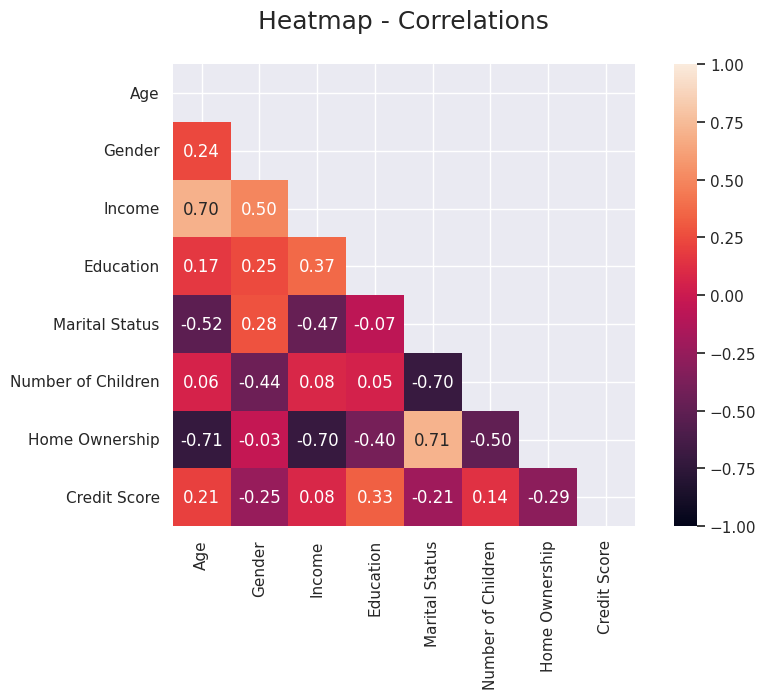

In [25]:
MASK = np.triu(np.ones_like(a=df.corr(), 
                            dtype=np.bool))

plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(),
            mask=MASK, 
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='0.2f')

plt.title('Heatmap - Correlations\n', size=18)
plt.xticks(rotation=90)
plt.show()

In [26]:
X = df.drop(labels=['Credit Score'], axis=1)
y = df['Credit Score']

In [27]:
len(X), len(y)

(164, 164)

In [28]:
X.shape, y.shape

((164, 7), (164,))

In [29]:
from sklearn.model_selection import train_test_split as tts 

In [30]:
X_train, X_val, y_train, y_val = tts(X, y,
                                     test_size=0.3,
                                     random_state=0)

In [31]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((114, 7), (50, 7), (114,), (50,))

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
list(DecisionTreeClassifier().get_params().keys())

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [34]:
?DecisionTreeClassifier

In [35]:
CLASS_WEIGHT = [None, 'balanced']
CRITERION = ['gini', 'entropy', 'log_loss']
MAX_DEPTH = [3, 4, 5, 6, 7, 8, 9, 10]
MAX_FEATURES = ['auto', 'sqrt', 'log2']
MIN_SAMPLES_LEAF = [1, 2, 3, 4]
MIN_SAMPLES_SPLIT = [2, 3, 4, 5]
RANDOM_STATE = [int(x) for x in np.linspace(start=0, stop=1_000, num=1001)]

In [36]:
param_grid_decTree = {
    'class_weight': CLASS_WEIGHT,
    'criterion': CRITERION,
    'max_depth': MAX_DEPTH,
    'max_features': MAX_FEATURES,
    'min_samples_leaf': MIN_SAMPLES_LEAF,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'random_state': RANDOM_STATE
}

In [37]:
model_dTree = DecisionTreeClassifier()

model_dTree

DecisionTreeClassifier()

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
random_search_decTree = RandomizedSearchCV(estimator=model_dTree,
                                           param_distributions=param_grid_decTree,
                                           n_jobs=-1,
                                           cv=10)

random_search_decTree

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]})

In [40]:
random_search_decTree.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]})

In [41]:
random_search_decTree.best_params_

{'random_state': 752,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'log_loss',
 'class_weight': 'balanced'}

In [42]:
type(random_search_decTree.best_params_)

dict

In [43]:
list(random_search_decTree.best_params_.values())[0]

752

In [44]:
RANDOM_STATE_decTree = list(random_search_decTree.best_params_.values())[0]
MIN_SAMPLES_SPLIT_decTree = list(random_search_decTree.best_params_.values())[1]
MIN_SAMPLES_LEAF_decTree = list(random_search_decTree.best_params_.values())[2]
MAX_FEATURES_decTree = list(random_search_decTree.best_params_.values())[3]
MAX_DEPTH_decTree = list(random_search_decTree.best_params_.values())[4]
CRITERION_decTree = list(random_search_decTree.best_params_.values())[5]
CLASS_WEIGHT_decTree = list(random_search_decTree.best_params_.values())[6]

In [45]:
print(RANDOM_STATE_decTree, MIN_SAMPLES_SPLIT_decTree, MIN_SAMPLES_LEAF_decTree,
      MAX_FEATURES_decTree, MAX_DEPTH_decTree, CRITERION_decTree, 
      CLASS_WEIGHT_decTree, sep=', ')

752, 3, 1, auto, 6, log_loss, balanced


In [46]:
decTree = DecisionTreeClassifier(
    random_state=RANDOM_STATE_decTree,
    min_samples_split=MIN_SAMPLES_SPLIT_decTree,
    min_samples_leaf=MIN_SAMPLES_LEAF_decTree,
    max_features=MAX_FEATURES_decTree,
    max_depth=MAX_DEPTH_decTree,
    criterion=CRITERION_decTree,
    class_weight=CLASS_WEIGHT_decTree
)

decTree

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=6, max_features='auto', min_samples_split=3,
                       random_state=752)

In [47]:
decTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=6, max_features='auto', min_samples_split=3,
                       random_state=752)

In [48]:
from sklearn.metrics import (accuracy_score, f1_score, jaccard_score, 
                             precision_score, recall_score, classification_report)

In [49]:
y_pred_decTree = decTree.predict(X_val)

print(f'Accuracy Score: {round(accuracy_score(y_val, y_pred_decTree) * 100, 2)}%')
print(f'F-1 Score: {round(f1_score(y_val, y_pred_decTree, average="micro") * 100, 2)}%')
print(f'Jaccard Score: {round(jaccard_score(y_val, y_pred_decTree, average="micro") * 100, 2)}%')
print(f'Precision Score: {round(precision_score(y_val, y_pred_decTree, average="micro") * 100, 2)}%')
print(f'Recall Score: {round(recall_score(y_val, y_pred_decTree, average="micro") * 100, 2)}%')

print('\n\t\t\tClassification Report:\n', classification_report(y_val, y_pred_decTree))

Accuracy Score: 96.0%
F-1 Score: 96.0%
Jaccard Score: 92.31%
Precision Score: 96.0%
Recall Score: 96.0%

			Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.97      0.97      0.97        37
           2       1.00      1.00      1.00         2

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [50]:
imp_df_decTree = pd.DataFrame(
    {'Feature Name': X_train.columns,
     'Importance': decTree.feature_importances_}
)

fi_decTree = imp_df_decTree.sort_values(by='Importance', ascending=False)
fi_decTree

,Feature Name,Importance
2,Income,0.654310
0,Age,0.176816
4,Marital Status,0.164944
1,Gender,0.003930
3,Education,0.000000
5,Number of Children,0.000000
6,Home Ownership,0.000000


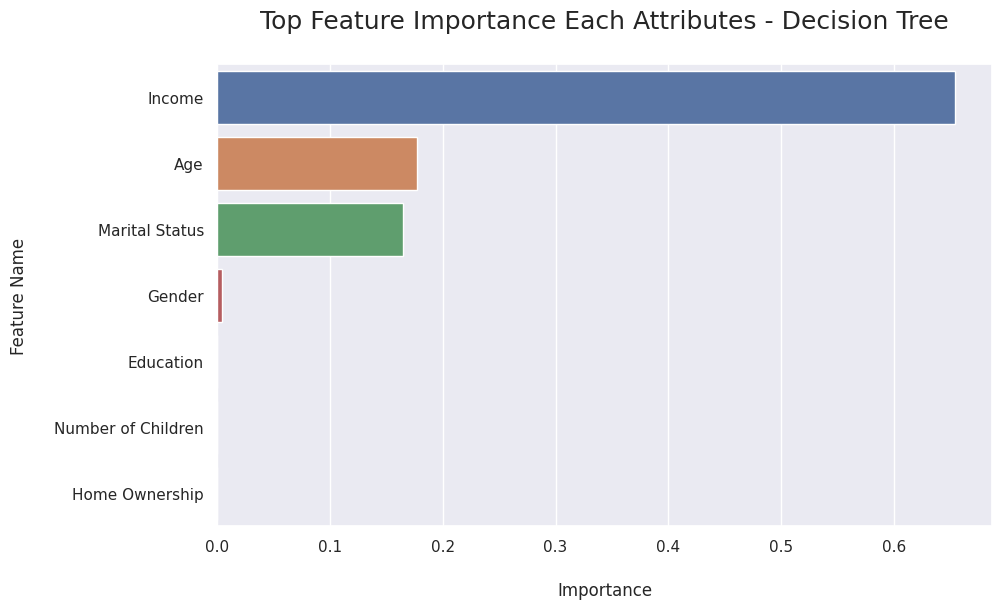

In [51]:
plt.figure(figsize=(10, 6))

sns.barplot(data=fi_decTree,
            x='Importance',
            y='Feature Name')

plt.title('Top Feature Importance Each Attributes - Decision Tree\n', 
          size=18)
plt.xlabel('\nImportance', fontsize=12)
plt.ylabel('Feature Name\n', fontsize=12)
plt.show()

In [52]:
!pip install --q shap -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.0 MB/s eta 0:00:00


In [53]:
import shap

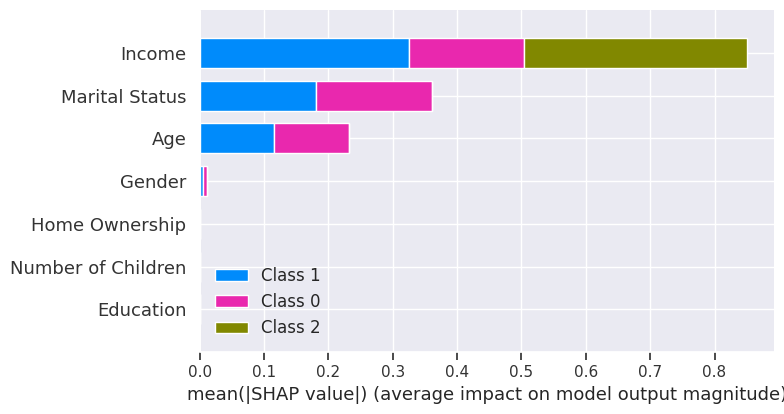

In [54]:
explainer_decTree = shap.TreeExplainer(model=decTree)

SHAP_VALUES_decTree = explainer_decTree.shap_values(X_val)
shap.summary_plot(shap_values=SHAP_VALUES_decTree, features=X_val)

In [55]:
df['Credit Score'].unique()

array([1, 0, 2])

In [56]:
from sklearn.metrics import confusion_matrix

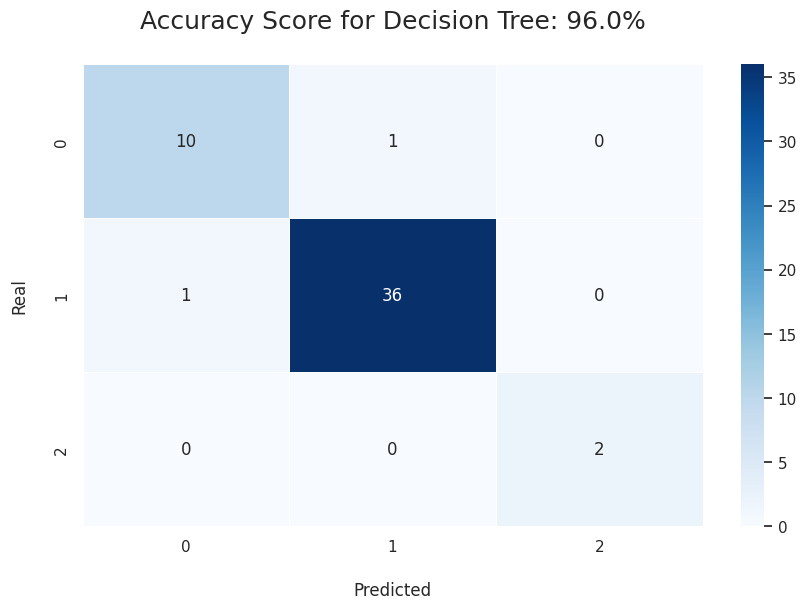

In [57]:
cm_decTree = confusion_matrix(y_val, y_pred_decTree)

plt.figure(figsize=(10, 6))
sns.heatmap(data=cm_decTree,
            linewidths=0.5,
            annot=True,
            cmap='Blues')

plt.xlabel('\nPredicted')
plt.ylabel('Real\n')
all_sample_title = f'''Accuracy Score for Decision Tree: {round
 (decTree.score(X_val, y_val) *100, 2)}%\n'''
plt.title(all_sample_title, size=18);                                                                   

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
list(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [60]:
?RandomForestClassifier

In [60]:
BOOTSTRAP_ = [True, False]
CLASS_WEIGHT_ = [None, 'balanced', 'balanced_subsample']
CRITERION_ = ['gini', 'entropy', 'log_loss']
MAX_DEPTH_ = [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MAX_FEATURES_ = [None, 'sqrt', 'log2']
N_ESTIMATORS_ = [int(x) for x in np.linspace(start=0, stop=1_000, num=1001)]
RANDOM_STATE_ = [int(x) for x in np.linspace(start=0, stop=1_000, num=1001)]

In [65]:
param_grid_randFor = {
    'bootstrap': BOOTSTRAP_,
    'class_weight': CLASS_WEIGHT_,
    'criterion': CRITERION_,
    'max_depth': MAX_DEPTH_,
    'max_features': MAX_FEATURES_,
    'n_estimators': N_ESTIMATORS_,
    'random_state': RANDOM_STATE_
}

In [66]:
model_randFor = RandomForestClassifier(n_jobs=-1)

model_randFor

RandomForestClassifier(n_jobs=-1)

In [67]:
random_search_randFor = RandomizedSearchCV(estimator=model_randFor,
                                           param_distributions=param_grid_randFor,
                                           n_jobs=-1,
                                           cv=10)

random_search_randFor

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]})

In [68]:
random_search_randFor.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]})

In [69]:
random_search_randFor.best_params_

{'random_state': 15,
 'n_estimators': 817,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': True}

In [70]:
type(random_search_randFor.best_params_)

dict

In [71]:
list(random_search_randFor.best_params_.values())[0]

15

In [72]:
RANDOM_STATE_randFor = list(random_search_randFor.best_params_.values())[0]
N_ESTIMATORS_randFor = list(random_search_randFor.best_params_.values())[1]
MAX_FEATURES_randFor = list(random_search_randFor.best_params_.values())[2]
MAX_DEPTH_randFor = list(random_search_randFor.best_params_.values())[3]
CRITERION_randFor = list(random_search_randFor.best_params_.values())[4]
CLASS_WEIGHT_randFor = list(random_search_randFor.best_params_.values())[5]
BOOTSTRAP_randFor = list(random_search_randFor.best_params_.values())[6]

In [73]:
print(RANDOM_STATE_randFor, N_ESTIMATORS_randFor, MAX_FEATURES_randFor,
      MAX_DEPTH_randFor, CRITERION_randFor, CLASS_WEIGHT_randFor, 
      BOOTSTRAP_randFor, sep=', ')

15, 817, log2, 8, gini, None, True


In [74]:
randFor = RandomForestClassifier(
    random_state=RANDOM_STATE_randFor,
    n_estimators=N_ESTIMATORS_randFor,
    max_features=MAX_FEATURES_randFor,
    max_depth=MAX_DEPTH_randFor,
    criterion=CRITERION_randFor,
    class_weight=CLASS_WEIGHT_randFor,
    bootstrap=BOOTSTRAP_randFor,
    n_jobs=-1
)

randFor

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=817,
                       n_jobs=-1, random_state=15)

In [75]:
randFor.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=817,
                       n_jobs=-1, random_state=15)

In [76]:
y_pred_randFor = randFor.predict(X_val)

print(f'Accuracy Score: {round(accuracy_score(y_val, y_pred_randFor) * 100, 2)}%')
print(f'F-1 Score: {round(f1_score(y_val, y_pred_randFor, average="micro") * 100, 2)}%')
print(f'Jaccard Score: {round(jaccard_score(y_val, y_pred_randFor, average="micro") * 100, 2)}%')
print(f'Precision Score: {round(precision_score(y_val, y_pred_randFor, average="micro") * 100, 2)}%')
print(f'Recall Score: {round(recall_score(y_val, y_pred_randFor, average="micro") * 100, 2)}%')

print('\n\t\t\tClassification Report:\n', classification_report(y_val, y_pred_randFor))

Accuracy Score: 98.0%
F-1 Score: 98.0%
Jaccard Score: 96.08%
Precision Score: 98.0%
Recall Score: 98.0%

			Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00         2

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [77]:
imp_df_randFor = pd.DataFrame(
    {'Feature Name': X_train.columns,
     'Importance': randFor.feature_importances_}
)

fi_randFor = imp_df_randFor.sort_values(by='Importance', ascending=False)
fi_randFor

,Feature Name,Importance
2,Income,0.354378
0,Age,0.228382
6,Home Ownership,0.213035
3,Education,0.067884
4,Marital Status,0.065864
1,Gender,0.045181
5,Number of Children,0.025276


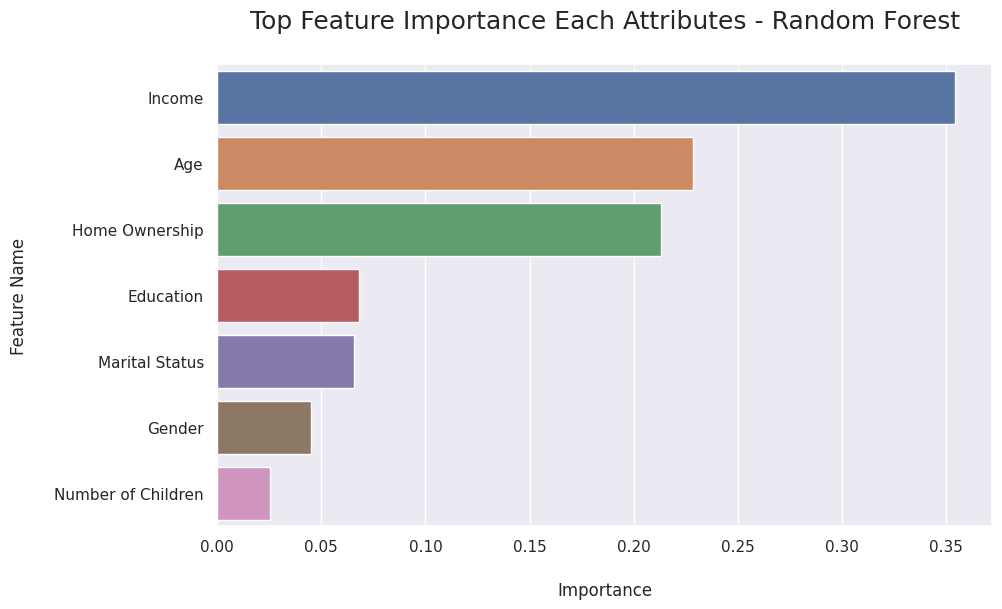

In [78]:
plt.figure(figsize=(10, 6))

sns.barplot(data=fi_randFor,
            x='Importance',
            y='Feature Name')

plt.title('Top Feature Importance Each Attributes - Random Forest\n', 
          size=18)
plt.xlabel('\nImportance', fontsize=12)
plt.ylabel('Feature Name\n', fontsize=12)
plt.show()

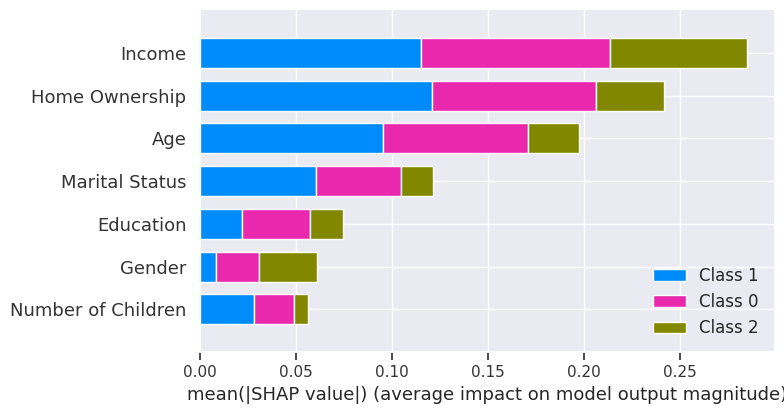

In [79]:
explainer_randFor = shap.TreeExplainer(model=randFor)

SHAP_VALUES_randFor = explainer_randFor.shap_values(X_val)
shap.summary_plot(shap_values=SHAP_VALUES_randFor, features=X_val)

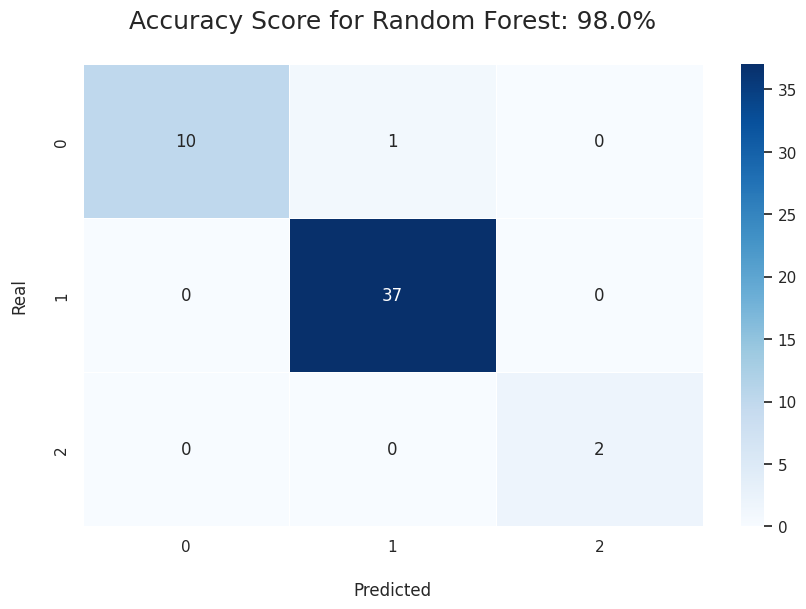

In [80]:
cm_randFor = confusion_matrix(y_val, y_pred_randFor)

plt.figure(figsize=(10, 6))
sns.heatmap(data=cm_randFor,
            linewidths=0.5,
            annot=True,
            cmap='Blues')

plt.xlabel('\nPredicted')
plt.ylabel('Real\n')
all_sample_title = f'''Accuracy Score for Random Forest: {round
 (randFor.score(X_val, y_val) *100, 2)}%\n'''
plt.title(all_sample_title, size=18);   

In [81]:
!pip install --q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00


In [82]:
%reload_ext watermark

%watermark -a 'EDA & DS - Credit Score Classification Prediction [05/2023] | Fernando Galvão - Data Scientist' --iversions

Author: EDA & DS - Credit Score Classification Prediction [05/2023] | Fernando Galvão - Data Scientist

shap      : 0.41.0
sklearn   : 1.2.2
numpy     : 1.22.4
pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.7.1
sweetviz  : 2.1.4



In [83]:
%whos

Variable                    Type                      Data/Info
---------------------------------------------------------------
BOOTSTRAP_                  list                      n=2
BOOTSTRAP_randFor           bool                      True
CLASS_WEIGHT                list                      n=2
CLASS_WEIGHT_               list                      n=3
CLASS_WEIGHT_decTree        str                       balanced
CLASS_WEIGHT_randFor        NoneType                  None
CRITERION                   list                      n=3
CRITERION_                  list                      n=3
CRITERION_decTree           str                       log_loss
CRITERION_randFor           str                       gini
DecisionTreeClassifier      ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
LabelEncoder                type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MASK                        ndarray                   8x8: 